In [ ]:
import pandas as pd

# Load datasets
team_stats_df = pd.read_csv("game_teams_stats.csv")
plays_df = pd.read_csv("game_plays.csv")  # Replace with your actual path

# Filter shots and goals only
shots_df = plays_df[plays_df['event'].isin(['Shot', 'Goal'])].copy()

# Add a close-range shot flag (example: x coordinate within 30 units of net)
shots_df['close_range'] = shots_df['x'].abs() < 30

# Aggregate shot data per team per game
agg_df = shots_df.groupby(['game_id', 'team_id_for']).agg({
    'x': 'mean',
    'y': 'mean',
    'close_range': 'sum',
    'secondaryType': lambda s: s.value_counts().to_dict()
}).reset_index()

# Rename coordinates
agg_df.rename(columns={'x': 'avg_shot_x', 'y': 'avg_shot_y'}, inplace=True)

# Extract specific shot types
for shot_type in ['Wrist Shot', 'Backhand', 'Slap Shot', 'Tip-In']:
    agg_df[f'num_{shot_type.lower().replace(" ", "_")}'] = agg_df['secondaryType'].apply(lambda d: d.get(shot_type, 0))

agg_df.drop(columns='secondaryType', inplace=True)

# Prepare team stats data (drop duplicates)
team_stats_df = team_stats_df.drop_duplicates(subset=['game_id', 'team_id'])

# Merge with team stats
merged_df = team_stats_df.merge(
    agg_df,
    left_on=['game_id', 'team_id'],
    right_on=['game_id', 'team_id_for'],
    how='left'
)

# Clean up
merged_df.drop(columns=['team_id_for'], inplace=True)

# Save to CSV if needed
merged_df.to_csv("game_teams_stats_with_shot_features.csv", index=False)


In [24]:
print('freaky ahh')

freaky ahh


In [ ]:
# Name : 
# Assignment Number & Name : EDA - NHL Win Classification
# I pledge my honor that I have abided by the Stevens Honor System.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NHL dataset
file_path = 'merged_with_won.csv'
df = pd.read_csv(file_path)

# Filter: drop unneeded columns and keep only one row per team per game
df = df.drop(columns=['game_id', 'team_id_for', 'team_id_against', 'play_id', 'event', 'secondaryType', 'startRinkSide'], errors='ignore')
df = df.dropna(subset=['won'])
df['won'] = df['won'].astype(int)

# Keep only numeric columns for correlation
numeric_only = df.select_dtypes(include='number')

# Show summary statistics
print(numeric_only.describe())
df.head()


                  x             y       team_id         shots          hits  \
count  29374.000000  29374.000000  36538.000000  36538.000000  36538.000000   
mean       0.537823     -0.194934     19.636433     30.754201     22.451092   
std       64.139055     23.283882     14.878139      7.575772      7.530658   
min      -99.000000    -42.000000      1.000000     15.000000      4.000000   
25%      -68.000000    -22.000000      9.000000     26.000000     17.000000   
50%        0.000000      0.000000     16.000000     29.000000     21.000000   
75%       69.000000     22.000000     26.000000     35.000000     28.000000   
max       99.000000     42.000000     53.000000     60.000000     42.000000   

                pim  powerPlayOpportunities  powerPlayGoals  \
count  36538.000000            36538.000000    36538.000000   
mean       9.929662                3.045542        0.649488   
std       12.351742                1.561752        0.702320   
min        0.000000                0

,x,y,team_id,HoA,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,won
0,NaN,NaN,4,away,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,0
1,NaN,NaN,16,home,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,1
2,NaN,NaN,4,away,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,0
3,NaN,NaN,16,home,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,1
4,NaN,NaN,4,away,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,0


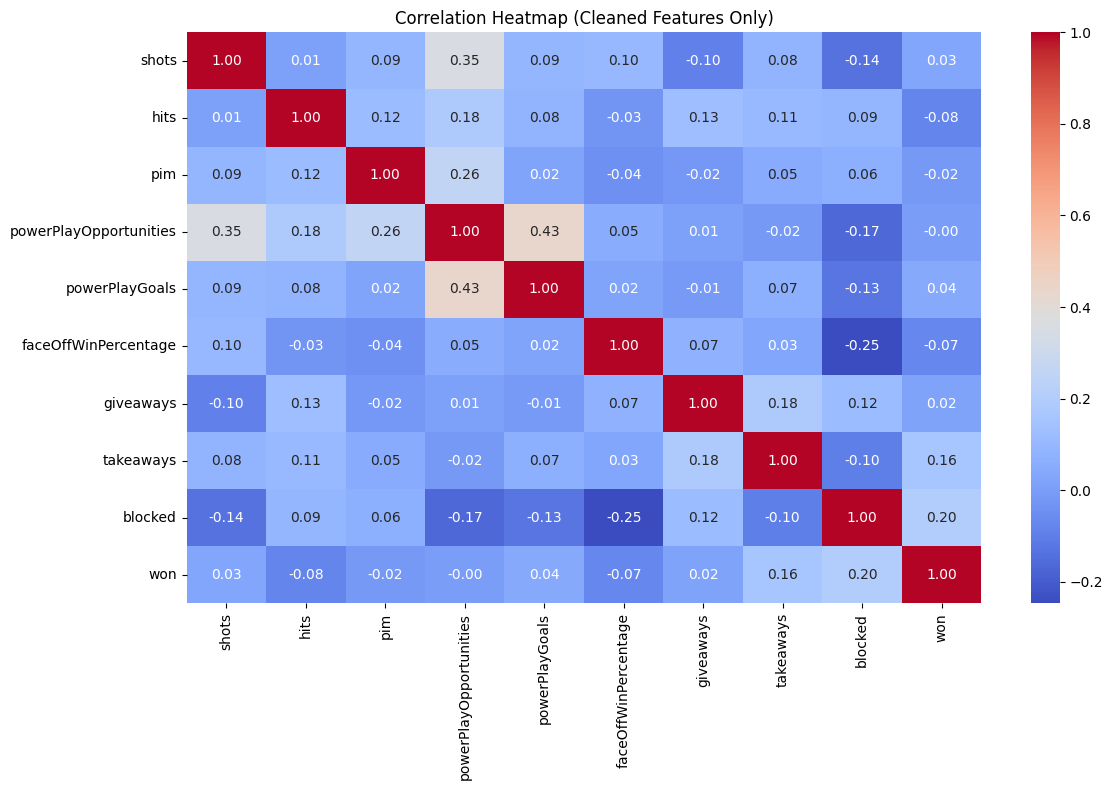

In [29]:
# Select only relevant performance features (exclude identifiers and play coords)
features = ['shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
            'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked', 'won']
corr_df = df[features]

# Plot corrected heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Cleaned Features Only)")
plt.tight_layout()
plt.show()


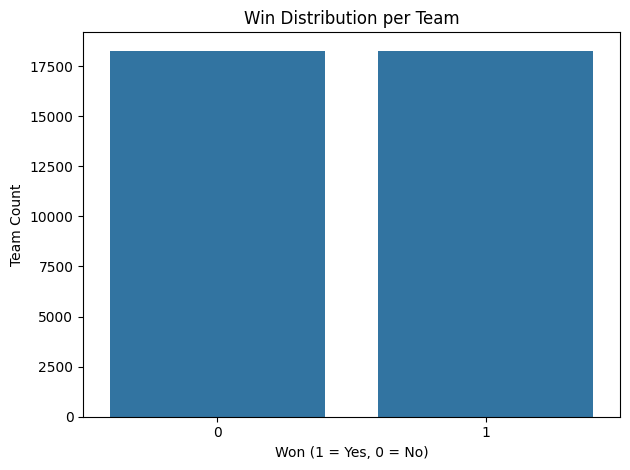

In [27]:
# Win Distribution (per team)
sns.countplot(data=df, x='won')
plt.title("Win Distribution per Team")
plt.xlabel("Won (1 = Yes, 0 = No)")
plt.ylabel("Team Count")
plt.tight_layout()
plt.show()


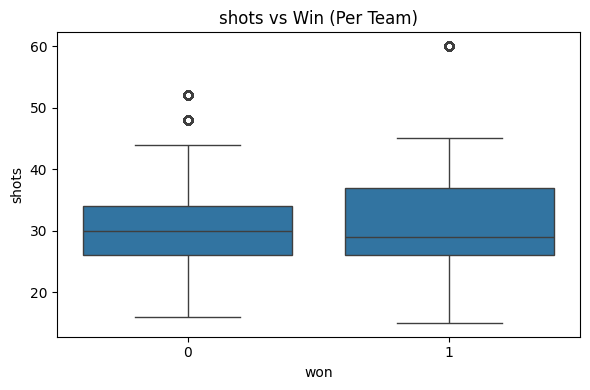

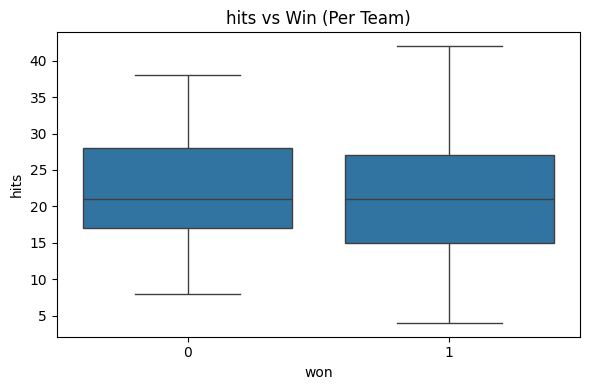

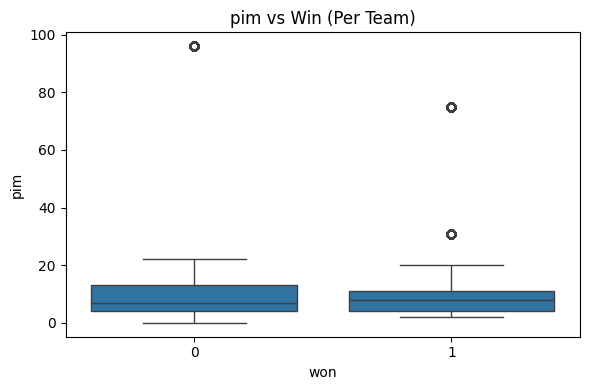

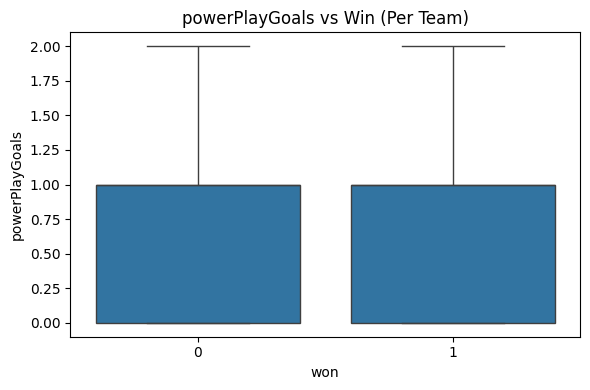

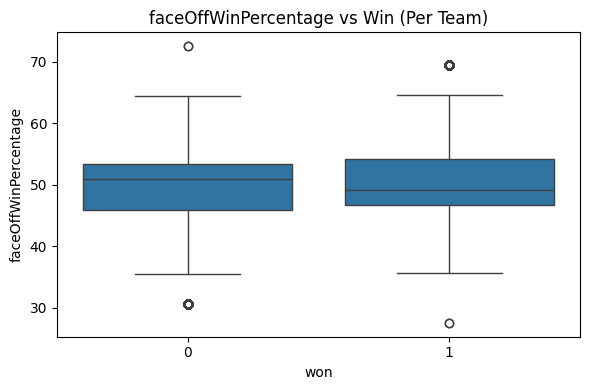

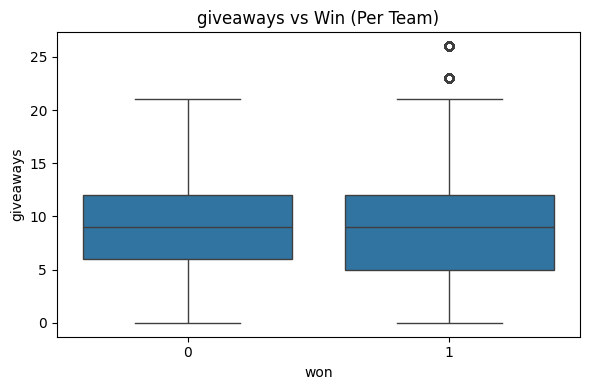

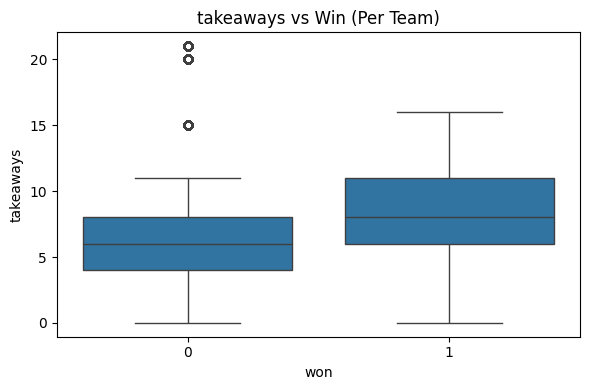

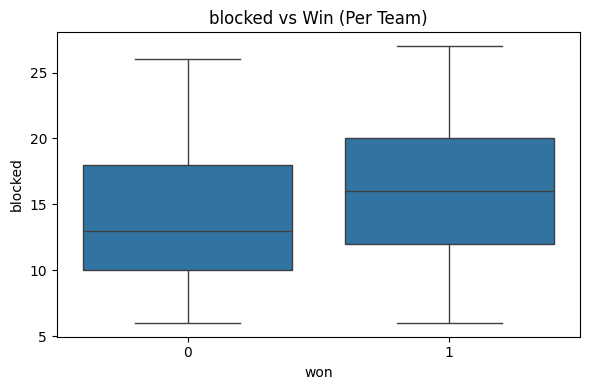

In [28]:
# Boxplots: team-level stats vs won
features = ['shots', 'hits', 'pim', 'powerPlayGoals', 'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked']
for f in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='won', y=f)
    plt.title(f"{f} vs Win (Per Team)")
    plt.tight_layout()
    plt.show()
